# Task-Diabetes Prediction

# import libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve

# load the dataset

In [3]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.shape

(768, 9)

# check the null values

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# check target variable

In [8]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

# Data Analysis

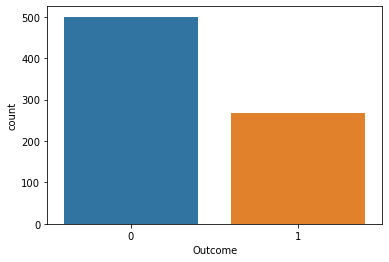

In [11]:
sns.countplot(x='Outcome',data=data)
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

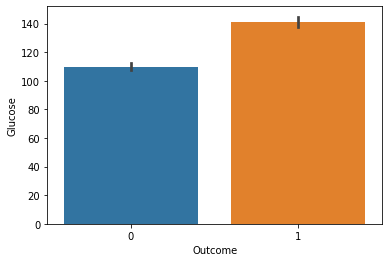

In [36]:
sns.barplot(x='Outcome',y='Glucose',data=data)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

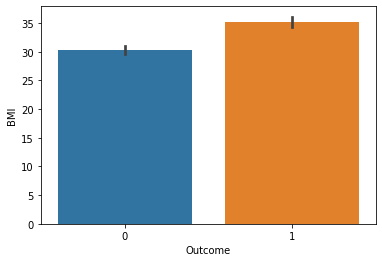

In [37]:
sns.barplot(x='Outcome',y='BMI',data=data)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

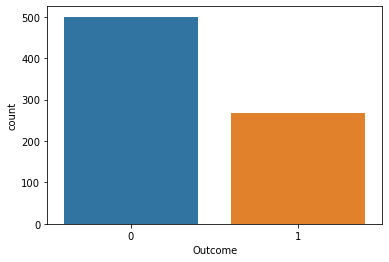

In [38]:
sns.countplot(x='Outcome',data=data)

# features and labels

In [15]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']
print(x.shape)
print(y.shape)

(768, 8)
(768,)


# dataset splitting

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

# model creation

In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [19]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
print('Train Scr',model.score(x_train,y_train))
print('Test Scr',model.score(x_test,y_test))

Train Scr 0.7821229050279329
Test Scr 0.7402597402597403


In [26]:
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]


In [27]:
accuracy=accuracy_score(y_test,y_pred)

In [28]:
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 74.03%


# confusion matrix

In [29]:
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[121  30]
 [ 30  50]]


# classification report

In [30]:
report=classification_report(y_test,y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [32]:
res = model.predict_proba(x_test)
print(res[:5])

[[0.73448967 0.26551033]
 [0.81663483 0.18336517]
 [0.87880421 0.12119579]
 [0.84386424 0.15613576]
 [0.50388687 0.49611313]]


# ROC-AUC Score

AUC 0.8002483443708608


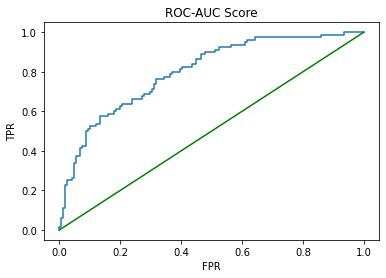

In [39]:
# res = lr1.predict_proba(x_test[:,1])

fpr,tpr,thresh = roc_curve(y_test,res[:,1])
auc_scr = roc_auc_score(y_test,res[:,1])
print('AUC',auc_scr)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='green')
plt.title('ROC-AUC Score')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()